In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('framingham.csv')
print(df.shape)
df.head()

(4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Dropping all the NaN values since only a small number of NaN values present.

In [2]:
df1 = df.dropna(how = 'any', axis = 0)
print(df1.shape)
df1.head()

(3658, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print('Gender')
print(df1['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(df1['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(df1['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(df1['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(df1['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(df1['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
0    0.556315
1    0.443685
Name: male, dtype: float64
----


Education
1.0    0.417168
2.0    0.300984
3.0    0.166211
4.0    0.115637
Name: education, dtype: float64
----


BP Medication
0.0    0.969656
1.0    0.030344
Name: BPMeds, dtype: float64
----


Stroke
0    0.994259
1    0.005741
Name: prevalentStroke, dtype: float64
----


Hypertension
0    0.688354
1    0.311646
Name: prevalentHyp, dtype: float64
----


Diabetes
0    0.972936
1    0.027064
Name: diabetes, dtype: float64
----




## Observations: 

1. Assuming that 0 is female and 1 is male - 55% is Female, 45% is Male
2. Most of the patients in the database (70%+) is below education level 2 and lower 
3. 96% of the patients are not on BP Medication 
4. 99% have not had a Stroke before 
5. About 69% are not Hypertension patients and 31% are
6. 97% users are not diabetic 

## Question - How are the above percentages split  among someone who has Heart Disease and someone who does not have Heart Disease? Can we form Hypothesis that give us insight into this?

In [4]:
disease = df1.groupby('TenYearCHD')

print('Gender')
print(disease['male'].value_counts(normalize = True))
print('----')
print('\n')

print('Education')
print(disease['education'].value_counts(normalize = True))
print('----')
print('\n')

print('BP Medication')
print(disease['BPMeds'].value_counts(normalize = True))
print('----')
print('\n')

print('Stroke')
print(disease['prevalentStroke'].value_counts(normalize = True))
print('----')
print('\n')

print('Hypertension')
print(disease['prevalentHyp'].value_counts(normalize = True))
print('----')
print('\n')

print('Diabetes')
print(disease['diabetes'].value_counts(normalize = True))
print('----')
print('\n')

Gender
TenYearCHD  male
0           0       0.575621
            1       0.424379
1           1       0.551167
            0       0.448833
Name: male, dtype: float64
----


Education
TenYearCHD  education
0           1.0          0.398259
            2.0          0.312802
            3.0          0.171880
            4.0          0.117059
1           1.0          0.522442
            2.0          0.235189
            3.0          0.134650
            4.0          0.107720
Name: education, dtype: float64
----


BP Medication
TenYearCHD  BPMeds
0           0.0       0.976137
            1.0       0.023863
1           0.0       0.933573
            1.0       0.066427
Name: BPMeds, dtype: float64
----


Stroke
TenYearCHD  prevalentStroke
0           0                  0.995808
            1                  0.004192
1           0                  0.985637
            1                  0.014363
Name: prevalentStroke, dtype: float64
----


Hypertension
TenYearCHD  prevalentHyp
0           

## Observations (Hypothesis): 

1. Males seem to be slightly susceptible to Heart Disease compared to Females. (Basicaly Gender may play a role)
2. While it looks like lower education level patients are more susceptible, the overall number of lower education level patients are also much higher 
3. BP Medication, Stroke and Diabetes dont seem to have too much of an impact
4. Hypertension, however, seems like it has an impact. 

##### All of the above will need statistical tests to see if Hypothesis is true
##### Running a Chi-Square Test on the variables wrt to TenYearCHD

In [5]:
print('Gender')
contigency= pd.crosstab(df1['male'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('Education')
contigency= pd.crosstab(df1['education'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('BP Medication')
contigency= pd.crosstab(df1['BPMeds'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('Stroke')
contigency= pd.crosstab(df1['prevalentStroke'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('Hypertension')
contigency= pd.crosstab(df1['prevalentHyp'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

print('Diabetes')
contigency= pd.crosstab(df1['diabetes'], df['TenYearCHD']) 
c, p, dof, expected = chi2_contingency(contigency) 
print(p)
print('____')

Gender
3.816765643320501e-08
____
Education
7.716846010437298e-07
____
BP Medication
1.4573326046561633e-07
____
Stroke
0.008775828886339244
____
Hypertension
9.161520374818205e-28
____
Diabetes
3.608262736322769e-08
____


#### Looks like all the categorical predictor variables have a p-value < 0.05 and every variable is a predictor in a patient getting a heart disease. 

# Now lets take a look at out continuous variables

#### Figuring out Quasi Constant Features 

1. Numerical Features that have low variance give very little discriminatory power to the Target Class
2. Using Sklearn's Variance Threshold Method, we can check if there are numerical columns with very little Variance 
3. We do this for features with pure Int/Float Values (Not the Categorical Columns) 

In [6]:
num_var = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']
df_num = df1[num_var]

In [7]:
for i in np.arange(0.0, 0.5, 0.01):
    sel = VarianceThreshold(threshold=i) #Checking different Variance Thresholds
    sel.fit(df_num)
    quasi_constant = df_num.columns[~sel.get_support()]
    print('Variance Threshold = ', i)
    print(quasi_constant)
    print('----')

Variance Threshold =  0.0
Index([], dtype='object')
----
Variance Threshold =  0.01
Index([], dtype='object')
----
Variance Threshold =  0.02
Index([], dtype='object')
----
Variance Threshold =  0.03
Index([], dtype='object')
----
Variance Threshold =  0.04
Index([], dtype='object')
----
Variance Threshold =  0.05
Index([], dtype='object')
----
Variance Threshold =  0.06
Index([], dtype='object')
----
Variance Threshold =  0.07
Index([], dtype='object')
----
Variance Threshold =  0.08
Index([], dtype='object')
----
Variance Threshold =  0.09
Index([], dtype='object')
----
Variance Threshold =  0.1
Index([], dtype='object')
----
Variance Threshold =  0.11
Index([], dtype='object')
----
Variance Threshold =  0.12
Index([], dtype='object')
----
Variance Threshold =  0.13
Index([], dtype='object')
----
Variance Threshold =  0.14
Index([], dtype='object')
----
Variance Threshold =  0.15
Index([], dtype='object')
----
Variance Threshold =  0.16
Index([], dtype='object')
----
Variance Thresho

##### From the above it is clear that there is no quasi-constant variance in any of the continuous variable

#### Checking for multicollinearity between continuous variables

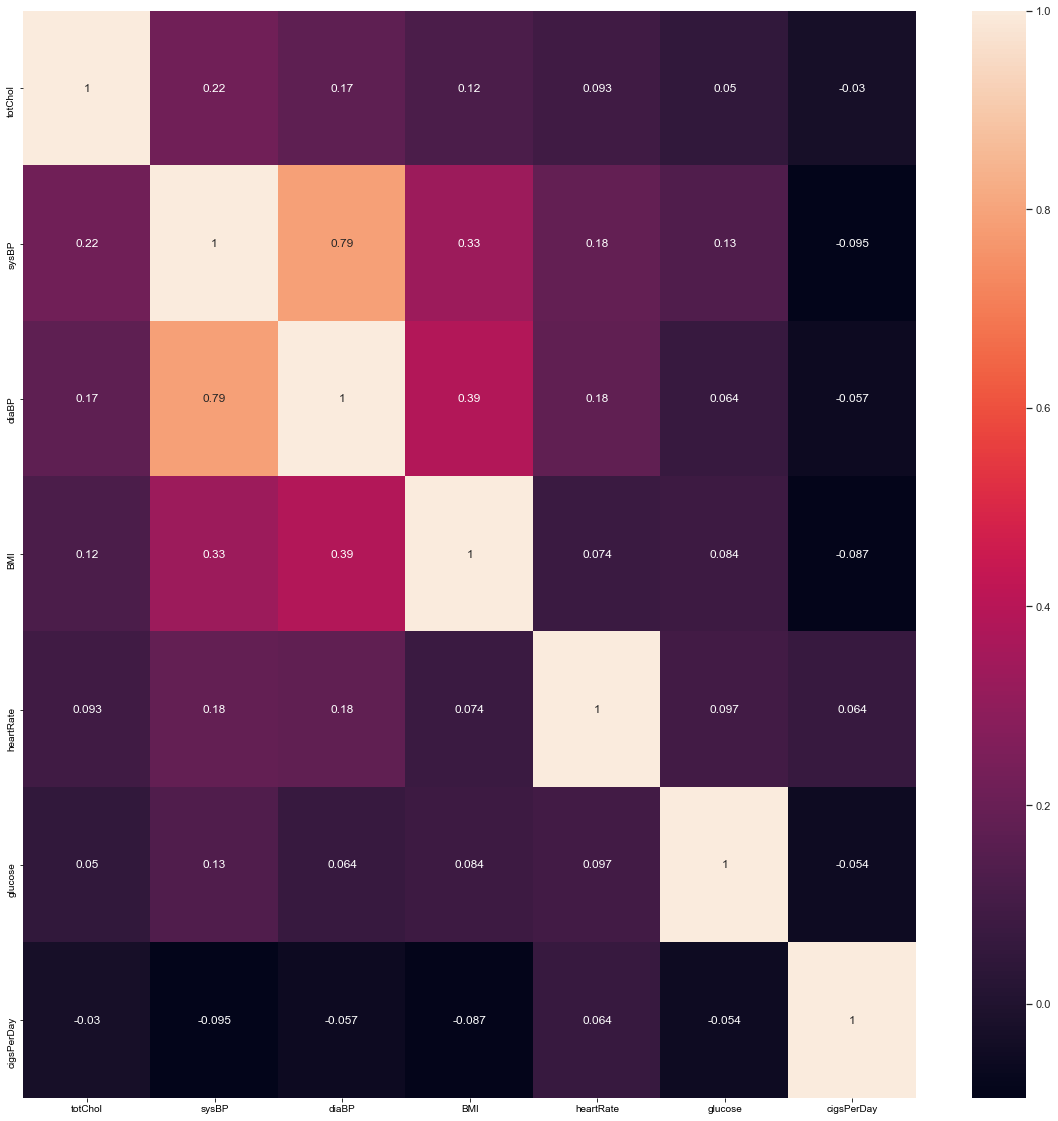

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(df_num.corr(), annot = True, ax = ax)

##### There seems to be a decently strong correlation between sysBP and diaBP

In [9]:
disease['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay'].agg(['mean', 'median'])

<ipython-input-9-3bbb7676ac32>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  disease['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay'].agg(['mean', 'median'])


totChol              sysBP             diaBP               BMI  \
                  mean median        mean median       mean median       mean   
TenYearCHD                                                                      
0           235.140922  232.0  130.285069  127.0  82.155272   81.0  25.641435   
1           246.350090  243.0  143.981149  139.0  87.157989   85.0  26.569838   

                   heartRate           glucose        cigsPerDay         
           median       mean median       mean median       mean median  
TenYearCHD                                                               
0           25.23  75.626572   75.0  80.617220   78.0   8.762657    0.0  
1           26.11  76.310592   75.0  88.732496   79.0  10.488330    1.0

##### Looking at the data above, we can see that there isnt too much of a difference in the Means and Medians for Heart Disease and No Heart Disease

###### But there are certain subtelties 

1. There seems to be a difference in the mean and median of sysBP 
2. There also seems to be a difference in the mean and median of Total Cholestrol 

###### To check these, we should conduct an independent t-test

In [10]:
for i in df_num.columns:
    print(i)
    no_hd = df1[df1['TenYearCHD']== 0]
    hd = df1[df1['TenYearCHD']== 1]
    print(ttest_ind(no_hd[i], hd[i]))
    print('----')

totChol
Ttest_indResult(statistic=-5.5459254975088355, pvalue=3.1312333433456134e-08)
----
sysBP
Ttest_indResult(statistic=-13.820299927851233, pvalue=2.1979526450387362e-42)
----
diaBP
Ttest_indResult(statistic=-9.181306228437387, pvalue=6.951220433917169e-20)
----
BMI
Ttest_indResult(statistic=-4.97824491190483, pvalue=6.712590771214128e-07)
----
heartRate
Ttest_indResult(statistic=-1.2406394241579448, pvalue=0.21481858832979397)
----
glucose
Ttest_indResult(statistic=-7.431606633554618, pvalue=1.3287895054580714e-13)
----
cigsPerDay
Ttest_indResult(statistic=-3.1492697108121703, pvalue=0.0016499903788356114)
----


In [11]:
df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


##### For Model - Dropping - diaBP (Correlated with sysBP), Heart Rate (Because of p-value >> 0.05). Other columns stay because they all have p-values < 0.05

In [12]:
dfmod = df1[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'BMI', 'glucose', 'TenYearCHD']]
dfmod.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,26.97,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,28.73,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,25.34,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,28.58,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,0


In [13]:
df_cat = dfmod[['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]
dfmod = pd.get_dummies(dfmod, columns = df_cat.columns, drop_first = True)
dfmod = dfmod[['male', 'age', 'currentSmoker', 'cigsPerDay', 'totChol', 'sysBP', 'BMI',
       'glucose', 'education_2.0', 'education_3.0',
       'education_4.0', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1', 'TenYearCHD']]
dfmod.head()

,male,age,currentSmoker,cigsPerDay,totChol,sysBP,BMI,glucose,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1,TenYearCHD
0,1,39,0,0.0,195.0,106.0,26.97,77.0,0,0,1,0,0,0,0,0
1,0,46,0,0.0,250.0,121.0,28.73,76.0,1,0,0,0,0,0,0,0
2,1,48,1,20.0,245.0,127.5,25.34,70.0,0,0,0,0,0,0,0,0
3,0,61,1,30.0,225.0,150.0,28.58,103.0,0,1,0,0,0,1,0,1
4,0,46,1,23.0,285.0,130.0,23.10,85.0,0,1,0,0,0,0,0,0


##### Checking for Multicollinearity using VIF - We start by removing each column with the highest VIF Value till all VIF Values < 5

In [14]:
vif_data = pd.DataFrame() 
vif_data["Feature"] = dfmod.columns
vif_data["VIF Score"] = [variance_inflation_factor(dfmod.values, i) for i in range(len(dfmod.columns))]
vif_data

,Feature,VIF Score
0,male,2.124877
1,age,41.291232
2,currentSmoker,4.907615
3,cigsPerDay,4.286220
4,totChol,31.097825
5,sysBP,66.907465
6,BMI,39.179888
7,glucose,19.109894
8,education_2.0,1.745546
9,education_3.0,1.406859


In [15]:
dfmod = dfmod.drop('sysBP', axis = 1)
vif_data = pd.DataFrame() 
vif_data["Feature"] = dfmod.columns
vif_data["VIF Score"] = [variance_inflation_factor(dfmod.values, i) for i in range(len(dfmod.columns))]
vif_data

,Feature,VIF Score
0,male,2.120295
1,age,34.130943
2,currentSmoker,4.889275
3,cigsPerDay,4.285202
4,totChol,29.732611
5,BMI,31.578462
6,glucose,18.249145
7,education_2.0,1.721839
8,education_3.0,1.401497
9,education_4.0,1.281163


In [16]:
dfmod = dfmod.drop('BMI', axis = 1)
vif_data = pd.DataFrame() 
vif_data["Feature"] = dfmod.columns
vif_data["VIF Score"] = [variance_inflation_factor(dfmod.values, i) for i in range(len(dfmod.columns))]
vif_data

,Feature,VIF Score
0,male,2.076854
1,age,29.089726
2,currentSmoker,4.888531
3,cigsPerDay,4.282357
4,totChol,26.211825
5,glucose,16.683785
6,education_2.0,1.716187
7,education_3.0,1.401479
8,education_4.0,1.280841
9,BPMeds_1.0,1.126928


In [17]:
dfmod = dfmod.drop('totChol', axis = 1)
vif_data = pd.DataFrame() 
vif_data["Feature"] = dfmod.columns
vif_data["VIF Score"] = [variance_inflation_factor(dfmod.values, i) for i in range(len(dfmod.columns))]
vif_data

,Feature,VIF Score
0,male,2.074753
1,age,15.063504
2,currentSmoker,4.876511
3,cigsPerDay,4.268772
4,glucose,15.625788
5,education_2.0,1.669949
6,education_3.0,1.382757
7,education_4.0,1.265653
8,BPMeds_1.0,1.126763
9,prevalentStroke_1,1.023524


In [18]:
dfmod = dfmod.drop('glucose', axis = 1)
vif_data = pd.DataFrame() 
vif_data["Feature"] = dfmod.columns
vif_data["VIF Score"] = [variance_inflation_factor(dfmod.values, i) for i in range(len(dfmod.columns))]
vif_data

,Feature,VIF Score
0,male,2.068991
1,age,4.224809
2,currentSmoker,4.841463
3,cigsPerDay,4.268698
4,education_2.0,1.614894
5,education_3.0,1.357438
6,education_4.0,1.254167
7,BPMeds_1.0,1.126644
8,prevalentStroke_1,1.023521
9,prevalentHyp_1,1.705639


##### We now have all columns with VIF value < 5 - We will use this for Modeling - Why 5? In general as a thumb rule, I have noticed that for columns with VIF < 5 it tends to work better for a model

In [19]:
selected_feat = []
for i in vif_data['Feature']:
    selected_feat.append(i)
selected_feat

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'education_2.0',
 'education_3.0',
 'education_4.0',
 'BPMeds_1.0',
 'prevalentStroke_1',
 'prevalentHyp_1',
 'diabetes_1',
 'TenYearCHD']

In [20]:
X = dfmod.drop(['TenYearCHD'], axis = 1)
y = dfmod['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
selected_feat.remove('TenYearCHD')
X_train = X_train[selected_feat]
X_train.head()

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
4163,1,65,1,6.0,0,0,1,0,0,0,0
2935,0,59,0,0.0,0,0,0,0,0,1,0
4166,1,57,0,0.0,0,0,1,0,0,0,0
2428,0,44,1,5.0,0,0,0,0,0,0,0
2350,0,51,0,0.0,1,0,0,0,0,0,0


### Using an SVM - Why? - This is a 2 class model - So intuitively I would choose a Logistic Regression or a Support Vector Classifier. Also SVM is less susceptible to Irrelevant features + General High accuracy - While speed of learning is slower, the SVM will take slightly longer

#### Scaling the features first because with SVM - the algorithm optimizes by minimizing the errors created by the decision boundary. 

In [21]:
std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,1.123812,1.798093,1.031952,-0.245317,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192
1,-0.889828,1.099284,-0.969037,-0.751760,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,1.482503,-0.17192
2,1.123812,0.866347,-0.969037,-0.751760,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192
3,-0.889828,-0.647740,1.031952,-0.329724,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
4,-0.889828,0.167538,-0.969037,-0.751760,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
...,...,...,...,...,...,...,...,...,...,...,...
2921,1.123812,-0.181867,-0.969037,-0.751760,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
2922,-0.889828,-0.880677,1.031952,0.936382,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,1.482503,-0.17192
2923,1.123812,0.284006,1.031952,0.936382,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
2924,1.123812,-1.113613,-0.969037,-0.751760,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192


In [22]:
clf = SVC(random_state=42)

param_grid = { 
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6],
    'gamma' : ['scale', 'auto']
}

gscv_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
gscv_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [23]:
gscv_clf.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [24]:
clf = SVC(degree = 2, gamma = 'scale', kernel= 'poly')
print(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy'))

[0.84982935 0.83276451 0.84982935 0.84641638 0.84982935 0.84641638
 0.84589041 0.84589041 0.84931507 0.84246575]


#### Let's see if Logistic Regression gives us a better score

In [25]:
clf = LogisticRegression(random_state=42)

param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

gscv_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
gscv_clf.fit(X_train, y_train)

C:\Users\Pratyush\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pratyush\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pratyush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pratyush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Pratyush\anaconda3\lib\site-packages\sklearn

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [26]:
gscv_clf.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [27]:
clf = LogisticRegression(penalty = 'l1', solver = 'liblinear')
print(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy'))

[0.84300341 0.84300341 0.83617747 0.86006826 0.84641638 0.85324232
 0.84589041 0.84246575 0.84931507 0.85273973]


## Unscaling for Random Forests

In [28]:
X = dfmod.drop(['TenYearCHD'], axis = 1)
y = dfmod['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
X_train = X_train[selected_feat]
X_train.head()

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
4163,1,65,1,6.0,0,0,1,0,0,0,0
2935,0,59,0,0.0,0,0,0,0,0,1,0
4166,1,57,0,0.0,0,0,1,0,0,0,0
2428,0,44,1,5.0,0,0,0,0,0,0,0
2350,0,51,0,0.0,1,0,0,0,0,0,0


In [29]:
clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

gscv_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
gscv_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [30]:
gscv_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [31]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 7, max_features = 'auto', n_estimators = 200)
print(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy'))

[0.84982935 0.84641638 0.84641638 0.84641638 0.84641638 0.84641638
 0.84246575 0.84589041 0.84931507 0.84589041]


#### All of the above classifiers are showing accuracy scores of aroun 84% - Can we try another approach to this?

In [32]:
df.head()
df = df.dropna(how = 'any', axis = 0)

In [33]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [34]:
sfs = SFS(RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=101), 
           k_features=10,
           forward=True, 
           floating=False,
           verbose=0,
           scoring='accuracy',
           cv=5)
sfs = sfs.fit(np.array(X_train), y_train)

In [35]:
selected_feat = X_train.columns[list(sfs.k_feature_idx_)]
selected_feat

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol'],
      dtype='object')

In [36]:
X_train = X_train[selected_feat]
clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10],
    'criterion' :['gini', 'entropy']
}

gscv_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
gscv_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [37]:
gscv_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 500}

In [38]:
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 6, max_features = 'auto', n_estimators = 500)
print(cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy'))

[0.84641638 0.84641638 0.84300341 0.84641638 0.84641638 0.84641638
 0.84589041 0.84589041 0.84589041 0.84589041]


#### Since all combinations that have been tried are giving an accuracy of 83-84% - Let us try SVM and LR to predict. Because there is a pretty good imbalance in class, there is an expectation that 0s will be predicted accurately while 1s may not. For this we will need to check Precision/Recall/F1 Score. In any case, in a later stage I will also try oversampling the data to see the results

In [40]:
selected_feat = []
for i in vif_data['Feature']:
    selected_feat.append(i)
selected_feat

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'education_2.0',
 'education_3.0',
 'education_4.0',
 'BPMeds_1.0',
 'prevalentStroke_1',
 'prevalentHyp_1',
 'diabetes_1',
 'TenYearCHD']

In [41]:
X = dfmod.drop(['TenYearCHD'], axis = 1)
y = dfmod['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
selected_feat.remove('TenYearCHD')
X_train = X_train[selected_feat]
X_train.head()

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
4163,1,65,1,6.0,0,0,1,0,0,0,0
2935,0,59,0,0.0,0,0,0,0,0,1,0
4166,1,57,0,0.0,0,0,1,0,0,0,0
2428,0,44,1,5.0,0,0,0,0,0,0,0
2350,0,51,0,0.0,1,0,0,0,0,0,0


In [42]:
std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,1.123812,1.798093,1.031952,-0.245317,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192
1,-0.889828,1.099284,-0.969037,-0.751760,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,1.482503,-0.17192
2,1.123812,0.866347,-0.969037,-0.751760,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192
3,-0.889828,-0.647740,1.031952,-0.329724,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
4,-0.889828,0.167538,-0.969037,-0.751760,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
...,...,...,...,...,...,...,...,...,...,...,...
2921,1.123812,-0.181867,-0.969037,-0.751760,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
2922,-0.889828,-0.880677,1.031952,0.936382,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,1.482503,-0.17192
2923,1.123812,0.284006,1.031952,0.936382,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
2924,1.123812,-1.113613,-0.969037,-0.751760,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192


In [43]:
clf = LogisticRegression(penalty = 'l1', solver = 'liblinear')
clf.fit(X_train, y_train)
X_test = std_scaler.transform(X_test)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.860655737704918


In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       625
           1       0.86      0.06      0.11       107

    accuracy                           0.86       732
   macro avg       0.86      0.53      0.51       732
weighted avg       0.86      0.86      0.80       732



In [45]:
print(confusion_matrix(y_test, predictions))

[[624   1]
 [101   6]]


##### As we can see the 1s are being heavily misclassified. Sampling methods need to be tried to decrease the misclassifications of 1s

In [46]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=9, random_state=100)
X, y = sm.fit_resample(X, y) 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
X_train = X_train[selected_feat]
X_train.head()

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
4217,0,66,0,0.0,0,0,0,0,0,1,0
5429,1,56,0,0.0,0,0,0,0,0,0,0
25,0,61,0,0.0,0,1,0,0,0,1,0
4268,1,54,1,30.0,0,0,0,0,0,0,0
5532,0,53,0,0.0,0,0,0,0,0,0,0


In [48]:
std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,-0.858513,1.697704,-0.968448,-0.772928,-0.519709,-0.352028,-0.297348,-0.151979,-0.060345,1.452703,-0.141218
1,1.164805,0.527581,-0.968448,-0.772928,-0.519709,-0.352028,-0.297348,-0.151979,-0.060345,-0.688372,-0.141218
2,-0.858513,1.112642,-0.968448,-0.772928,-0.519709,2.840681,-0.297348,-0.151979,-0.060345,1.452703,-0.141218
3,1.164805,0.293557,1.032580,1.663953,-0.519709,-0.352028,-0.297348,-0.151979,-0.060345,-0.688372,-0.141218
4,-0.858513,0.176544,-0.968448,-0.772928,-0.519709,-0.352028,-0.297348,-0.151979,-0.060345,-0.688372,-0.141218
...,...,...,...,...,...,...,...,...,...,...,...
4956,1.164805,-0.408517,-0.968448,-0.772928,1.924154,-0.352028,-0.297348,-0.151979,-0.060345,-0.688372,-0.141218
4957,1.164805,-1.578639,1.032580,1.663953,-0.519709,-0.352028,-0.297348,-0.151979,-0.060345,-0.688372,-0.141218
4958,1.164805,0.059532,1.032580,0.851660,-0.519709,-0.352028,-0.297348,-0.151979,-0.060345,-0.688372,-0.141218
4959,1.164805,-1.344615,-0.968448,-0.772928,-0.519709,-0.352028,3.363060,-0.151979,-0.060345,-0.688372,-0.141218


In [49]:
clf = LogisticRegression(penalty = 'l1', solver = 'liblinear')
clf.fit(X_train, y_train)
X_test = std_scaler.transform(X_test)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.6929895245769541


In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       616
           1       0.69      0.71      0.70       625

    accuracy                           0.69      1241
   macro avg       0.69      0.69      0.69      1241
weighted avg       0.69      0.69      0.69      1241



In [51]:
print(confusion_matrix(y_test, predictions))

[[415 201]
 [180 445]]


## While the overall accuracy of classifying 1s has improved, overall accuracy has decreased quite badly

##### Let's try the same using SVM

In [52]:
clf = SVC(degree = 2, gamma = 'scale', kernel= 'poly')
clf.fit(X_train, y_train)
X_test = std_scaler.transform(X_test)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.6712328767123288


In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       616
           1       0.65      0.74      0.69       625

    accuracy                           0.67      1241
   macro avg       0.67      0.67      0.67      1241
weighted avg       0.67      0.67      0.67      1241



In [54]:
print(confusion_matrix(y_test, predictions))

[[373 243]
 [165 460]]


### SVM seems to be performing worse. Also because SVM needs a much larger amount of Data, we cannot expect accuracy to be great with a small dataset

##### Now lets redo the Logistic Regression Model and change our thresholds. 

In [55]:
X = dfmod.drop(['TenYearCHD'], axis = 1)
y = dfmod['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
X_train = X_train[selected_feat]
X_train.head()

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
4163,1,65,1,6.0,0,0,1,0,0,0,0
2935,0,59,0,0.0,0,0,0,0,0,1,0
4166,1,57,0,0.0,0,0,1,0,0,0,0
2428,0,44,1,5.0,0,0,0,0,0,0,0
2350,0,51,0,0.0,1,0,0,0,0,0,0


In [56]:
std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,male,age,currentSmoker,cigsPerDay,education_2.0,education_3.0,education_4.0,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,1.123812,1.798093,1.031952,-0.245317,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192
1,-0.889828,1.099284,-0.969037,-0.751760,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,1.482503,-0.17192
2,1.123812,0.866347,-0.969037,-0.751760,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192
3,-0.889828,-0.647740,1.031952,-0.329724,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
4,-0.889828,0.167538,-0.969037,-0.751760,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
...,...,...,...,...,...,...,...,...,...,...,...
2921,1.123812,-0.181867,-0.969037,-0.751760,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
2922,-0.889828,-0.880677,1.031952,0.936382,1.523557,-0.450694,-0.359574,-0.180175,-0.069338,1.482503,-0.17192
2923,1.123812,0.284006,1.031952,0.936382,-0.656359,-0.450694,-0.359574,-0.180175,-0.069338,-0.674535,-0.17192
2924,1.123812,-1.113613,-0.969037,-0.751760,-0.656359,-0.450694,2.781066,-0.180175,-0.069338,-0.674535,-0.17192


In [57]:
clf = LogisticRegression(penalty = 'l1', solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [58]:
from sklearn import metrics
X_test = std_scaler.transform(X_test)
probs = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:,1])

In [59]:
threshold_chosen = thresholds[np.argmax(tpr - fpr)]
threshold_chosen

0.18000083724434623

In [60]:
preds = np.where(clf.predict_proba(X_test)[:,1] > threshold_chosen, 1, 0)

In [61]:
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

0.7390710382513661
[[470 155]
 [ 36  71]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       625
           1       0.31      0.66      0.43       107

    accuracy                           0.74       732
   macro avg       0.62      0.71      0.63       732
weighted avg       0.84      0.74      0.77       732



# There is a very slight improvement 

##### Overall, we would need a lot more data to be able to model the outcome